In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from numpy import where

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df.head()

,level_0,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,255.0,0.0,63.0,1.0,1.0,145.0,233.0,0.0,2.0,150.0,0.0,2.2,3.0,0.0,3.0,0.0
1,1.0,140.0,67.0,1.0,4.0,160.0,228.0,0.0,2.0,108.0,1.0,2.5,2.0,0.0,3.0,1.0
2,2.0,2.0,67.0,1.0,4.0,120.0,229.0,1.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,3.0,3.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1.0
4,4.0,4.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib as jb



#df = pd.read_csv('/content/deploy_data.csv',index_col=0)

df = pd.read_csv('/content/attempt1.csv',index_col=0)
#d=pd.read_csv('/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/Notebook/data2.csv',index_col=0)

X = df.drop(['num'], axis=1)

y = df['num']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state=42)

f_c = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)


jb.dump(f_c, 'model88.pkl')
print("Model dumped!")

model_columns = list(X.columns)
jb.dump(model_columns, 'model_columns_x.pkl')
print("Model Columns dumped!")


Model dumped!
Model Columns dumped!


##heading

In [3]:
df = pd.read_csv('/content/data_2.csv',index_col=0)

In [4]:
df.num = df.num.where(df.num < 1, 1)

In [40]:

X=df.drop(['num'], axis=1)
y = df['num']


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak','ca','thal']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

In [62]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state=42)

In [ ]:
sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
counter = Counter(y)
print(counter)

Counter({1.0: 524, 0.0: 396})


In [63]:

f_c = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)

#Feature Selection

[0.06573048 0.0359839  0.11811426 0.06403221 0.08693242 0.01487751
 0.03338176 0.07486117 0.11736001 0.06926614 0.05064391 0.09697762
 0.17183861]


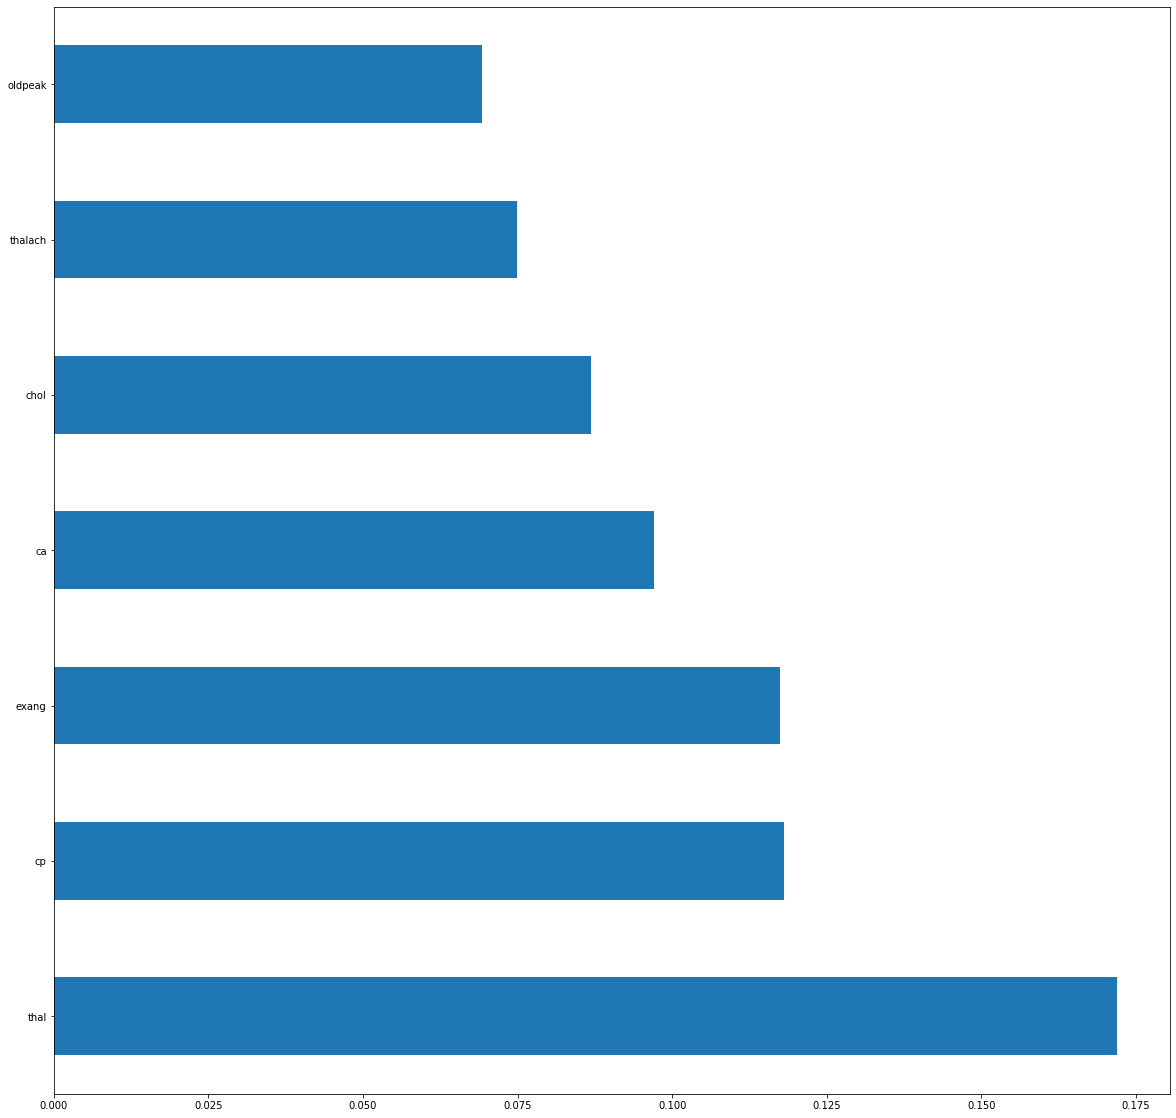

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,20))
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

#Feature Encoding

In [44]:
# preprocess
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler

numeric_features = ['chol','thalach','oldpeak'] # purely numeric features
numeric_transformer = Pipeline(steps=[
    
    ('scaler', RobustScaler())])

categorical_features =  ['cp','exang','ca','thal'] # (noisy columns removed -> ref: baseline)+ ['s53', 's54', 's55']
categorical_transformer = Pipeline(steps=[
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # ignore / error

passthrough_features = ['label']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

prep_pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor)])

In [45]:
prep_pipeline_1.fit(df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['chol', 'thalach',
                                                   'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cp', 'exang', 'ca',
                                                   'thal'])]))])

In [21]:
df=df.drop(['level_0','index'],axis=1)

In [46]:
train_df_proc_1 = prep_pipeline_1.fit_transform(df)

In [47]:
train_df_proc_1.shape

(920, 16)

In [48]:
# categorical feature mappings slice indices [13,70]
trans_cat_cols = prep_pipeline_1.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)

all_features_1 = numeric_features + trans_cat_cols.tolist()
print(all_features_1)


all_features_2 = numeric_features + categorical_features
print(all_features_2)

['chol', 'thalach', 'oldpeak', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_0.0', 'exang_1.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']
['chol', 'thalach', 'oldpeak', 'cp', 'exang', 'ca', 'thal']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
pd.DataFrame(train_df_proc_1, columns = all_features_1) # all_features

,chol,thalach,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,exang_0.0,exang_1.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.106825,0.285714,0.736842,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.047478,-0.914286,0.894737,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.059347,-0.314286,0.947368,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.308605,1.342857,1.421053,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.237389,0.914286,0.315789,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.293769,-1.971429,-0.421053,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
916,-1.008902,-1.714286,-0.684211,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
917,-0.094955,-1.142857,-0.421053,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
918,1.910979,0.485714,0.315789,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
df1=pd.DataFrame(train_df_proc_1, columns = all_features_1) # all_features

In [51]:
X=df1
y = df['num']

#end

In [61]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
oversample = SMOTE()
X_test, y_test = oversample.fit_resample(X_test, y_test)

In [ ]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
f_c = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)

In [36]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 369, 1.0: 364})


In [37]:
counter = Counter(y_test)
print(counter)

Counter({1.0: 160, 0.0: 155})


In [ ]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

NameError: ignored

In [64]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [ ]:
import scikitplot as skplt 
ltrain=Naive.predict(xtrain_tfidf)
ltest=Naive.predict(xtest_tfidf)
skplt.metrics.plot_confusion_matrix(
    ytrain, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('naive-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    ytest, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('naive-test',dpi=300);


In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
! pip install -q scikit-plot

In [ ]:
import scikitplot as skplt

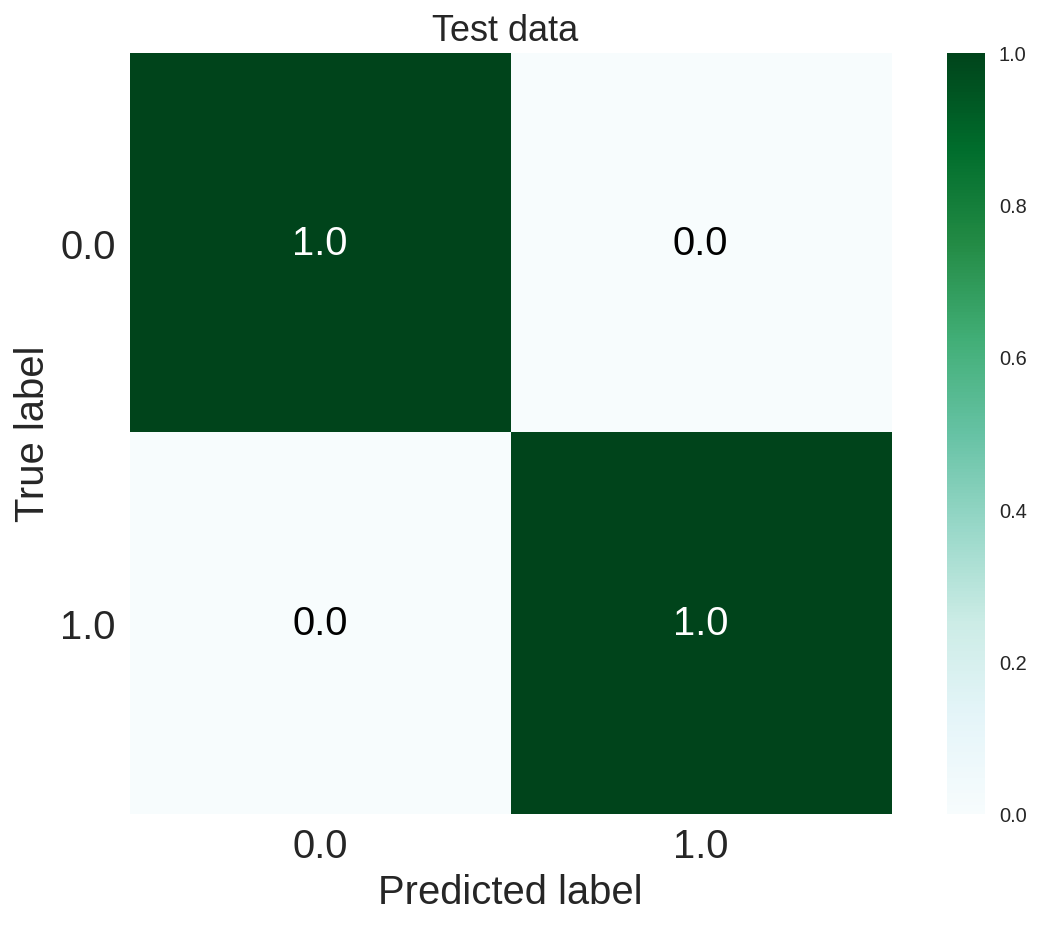

In [ ]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='20',
    title ='Test data ',
    cmap='BuGn',
    normalize=True
   
    )
plt.savefig('naive-test',dpi=300);


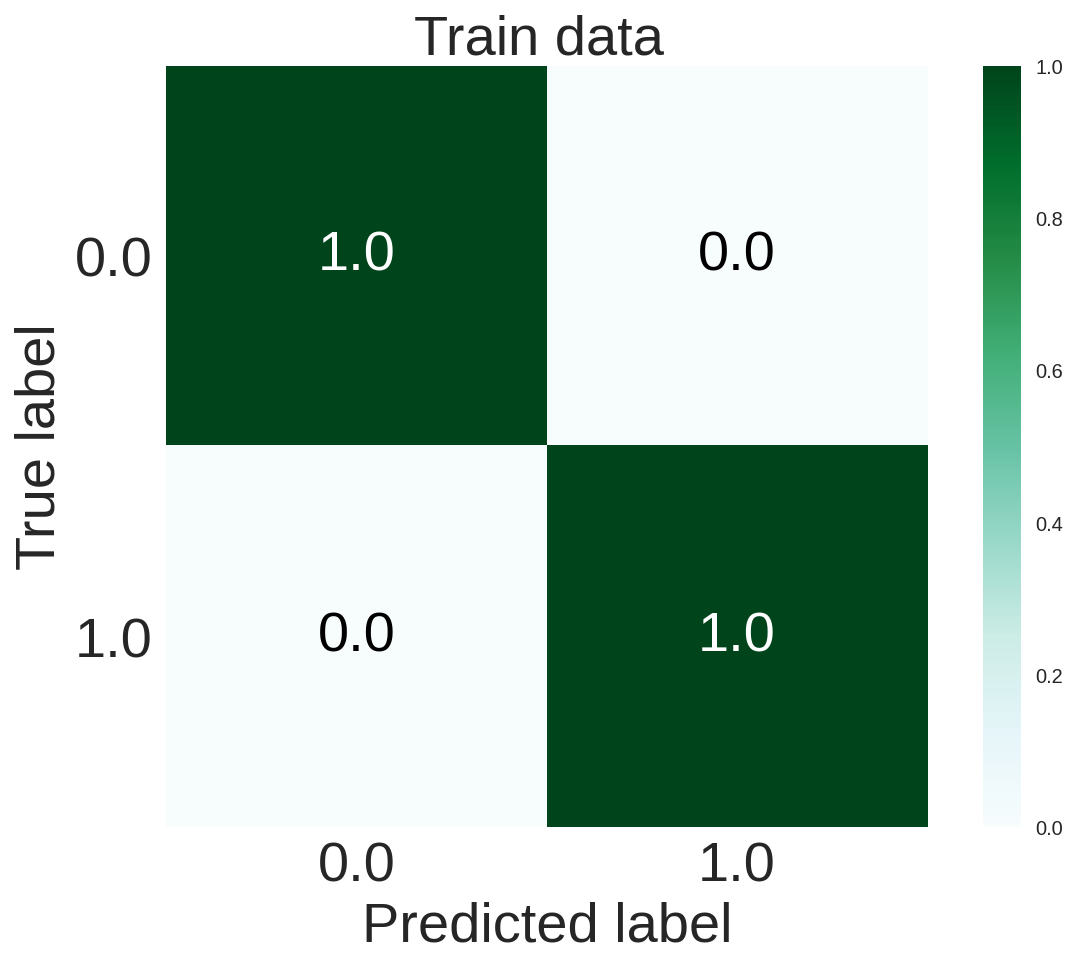

In [ ]:
import scikitplot as skplt 
ltrain=clf.predict(X_train)
#ltest=Naive.predict(X_test)
skplt.metrics.plot_confusion_matrix(
    y_train, 
    ltrain,
    figsize=(10,7),
    title_fontsize='28',
    text_fontsize='28',
    title ='Train data ',
    cmap='BuGn',
    normalize=True
    )
plt.savefig('naive-train',dpi=300);

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

estimators = [
               
             
               ('xgb', XGBClassifier(n_estimators=2000, eta=.1, subsample=.7, colsample_bytree=.3,eval_metric='mlogloss')),
               #('svm', SVC(kernel='rbf',degree=5,gamma=.3,C=2,random_state=42)),
                ('knn',  KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)),
    #('ada',AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME',learning_rate=1.0,n_estimators=500)),
               ('classifier' ,MLPClassifier(hidden_layer_sizes=(250,150,100), max_iter=100,activation = 'relu',solver='sgd',random_state=42))
                ] 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=5000))

clf.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.8412698412698413

In [ ]:
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Stacking1',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking1,0.875,0.873,0.874,0.871,0.875,0.873
1,Stacking1,0.869,0.867,0.868,0.888,0.890,0.889
2,Stacking1,0.911,0.908,0.909,0.878,0.878,0.878
3,Stacking1,0.863,0.860,0.861,0.871,0.875,0.873
4,Stacking1,0.923,0.921,0.922,0.882,0.886,0.884
5,Stacking1,0.896,0.893,0.894,0.872,0.873,0.872


In [ ]:
X_try=[[55,	1,	3,	140,	247,	1,	2,	109,	1,	1.4,	1],
[58	,0,	2,	135	,187,	1	,1,	115	,1,	1	,1],
[	67,	0	,4	,130,	243,	0	,2,	122	,1,	2.4,	2	],
[61	,1,	4	,129,	343,	0,	0,	124,	1,	1.2,	2],
	[55	,1,	3,	123	,230,	0	,2,	165,	0,	2.3,	2	],
	[54,	0	,4	,132,	284,	0	,2,	116,	1,	3,	2],
[	63,	1,	4,	140,	265,	0,	0	,113,	0	,0.8,	2],
[53,	0,	4	,120,	233,	0,	0,	110,	0	,0.7,	1],
[	54,	0	,2,	122,	204,	0,	0	,175,	0,	0	,1],
	[62	,0,	2	,112	,125,	0,	1,	172,	0,	0.2	,1],
[41,	1,	4	,108,	157,	0,	0,	142	,0,	0	,1],
[	33,	1	,4,	120,	228	,0,	0,	152	,0,	0.5	,2],
[48	,1,	4	,129,	217,	0,	0,	163	,1,	1.5,	2],
[	44,	0	,2,	137,	207	,0,	0	,112,	0,	0	,1],
[46	,0	,4,	124,	218,	0	,0,	115,	0	,0,	1],
[23,	0,	3,	121,	150	,1,	0	,84,	0	,0.2,	2],
[23,	0,	3,	116,	140,	0,	0	,97	,0,	0	,2],
[	22,	1	,4,	125	,153,	0,	0,	112,	0	,0	,2],
[21,	1,	4	,107,	126	,0,	0,	102	,0,	0,	2	],
[	22,	1,	4	,119,	136,	0,	0,	114	,0,	0	,2	],
[65,1,3,138,276,1,2,105,1,1.4,1],
[58,0,2,130,185,1,0,115,1,1,1],
[57,0,4,120,253,0,2,120,1,2.5,2],
[59,1,4,132,353,0,0,132,1,1.2,2],
[51,1,3,120,230,0,2,165,0,2.5,2],
[54,0,4,122,286,0,2,116,1,3,2],
[53,1,4,100,255,0,0,103,0,0.8,2],
[63,0,4,120,233,0,0,110,0,0.7,1],
[54,0,2,120,204,0,0,174,0,0,1],
[61,0,2,112,125,0,1,172,0,0.3,1],
[40,1,4,108,157,0,0,142,0,0,1],
[32,1,4,120,228,0,0,152,0,0.5,2],
[38,1,4,120,218,0,0,162,1,1.5,2],
[43,0,2,142,207,0,0,112,0,0,1],
[45,0,4,124,218,0,0,115,0,0,1],
[23,0,3,120,150,1,0,84,0,0.2,2],
[23,0,3,115,140,0,0,97,0,0,2],
[22,1,4,98,133,0,0,112,0,0,2],
[23,0,4,107,126,0,0,102,0,0,2],
[23,1,4,119,136,0,0,114,0,0,2]]

In [ ]:
clf.predict(X_try)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
TestX=X_try
Testy=[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Predict the labels of the test set samples
predicted_labels = clf.predict(TestX)
cnf_matrix = confusion_matrix(Testy, predicted_labels)

In [ ]:
class_names=['green','red']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
ACC

array([0.9, 0.9])

In [ ]:
PPV

array([0.88461538, 0.92857143])

In [ ]:
TNR

array([0.8125    , 0.95833333])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_test=format(precision_score(Testy, clf.predict(TestX), average='macro'),'.3f')
recall_test=format(recall_score(Testy, clf.predict(TestX), average='macro'),'.3f')
f1_test=format(f1_score(Testy, clf.predict(TestX), average='macro'),'.3f')

In [ ]:
precision_test

'0.907'

In [ ]:
recall_test

'0.885'

In [ ]:
f1_test

'0.893'

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(Testy, clf.predict(TestX))
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.93      0.81      0.87        16

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



In [60]:
c=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=100,activation = 'tanh',solver='adam',random_state=42)
c.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8188405797101449

In [ ]:
X_test.head

<bound method NDFrame.head of           age  sex  cp  trestbps  ...   thalach  exang  oldpeak  slope
319 -1.384615    1   2     -0.75  ...  1.131034      0  -0.3125      1
377 -0.692308    1   2      0.50  ... -0.468966      0  -0.3125      1
538 -0.461538    1   4      1.00  ... -1.296552      1   0.6250      2
296  0.384615    1   4      1.70  ... -1.351724      0   1.5625      2
531 -1.076923    0   4      1.00  ... -0.662069      0   0.9375      2
..        ...  ...  ..       ...  ...       ...    ...      ...    ...
280  0.307692    1   4      1.00  ...  0.110345      1   0.3750      2
60  -0.230769    0   4      0.00  ...  0.082759      1   0.4375      2
136  1.230769    1   4      0.75  ... -0.386207      1   1.3125      3
764  0.230769    1   4      1.25  ... -0.386207      1   0.9375      3
670 -0.076923    1   4     -1.00  ... -1.241379      0  -0.3125      2

[92 rows x 11 columns]>

In [ ]:
X_1=[[120,0.2,3,23,150,84,0,2,0,0,0]]
X_new2=[[34,	0,	2,	120,	204,	0,	0,	174,	0,	0.0,	1]]
X_new3=[[50,	1,	3	,100,	233	,0,	1	,163,	0	,0.7,	2]]
X_new4=[[23,	1,	3	,100,	203	,0,	0	,103,	0	,2.1,	2]]


In [ ]:
x=[[0.692307692,	1,	1,	0.75,	0.128686327,	1,	2,	0.303448276,	0	,1.125,	1]]


In [ ]:
clf.predict_proba(X_new3)

ValueError: ignored

In [ ]:
evaluation = pd.DataFrame({
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = [precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Stacking',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#! pip install -q scikit-plot
#import scikitplot as skplt
import pickle
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

evaluation1 = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 82, 97
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.test.is_gpu_available()

     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

NameError: ignored

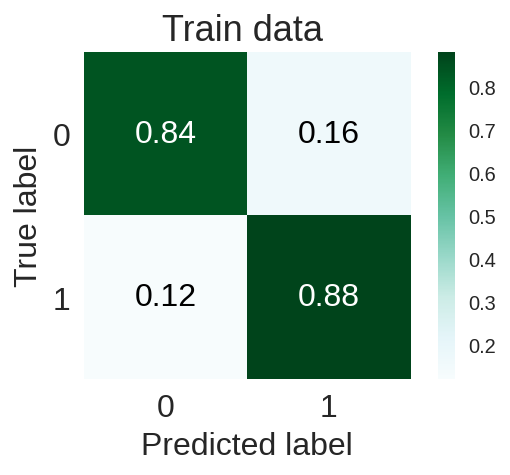

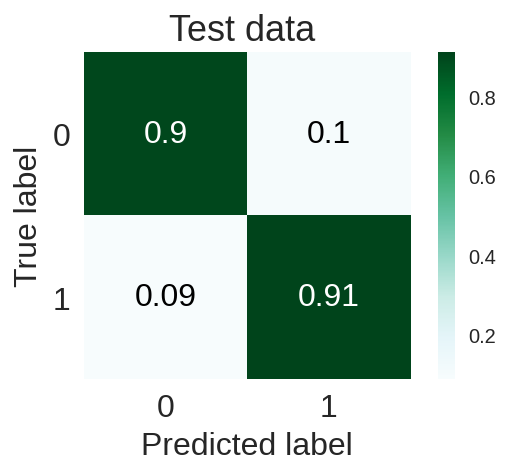

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(5,3),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='BuGn',
    normalize=True
    )
plt.savefig('CM2_train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(5,3),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='BuGn',
    normalize=True
    )
plt.savefig('CM2_test',dpi=300);
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(Y_TRUE, Y_PRED, normalize=True)
y_train=p
y_test=q
from scipy import interp

from itertools import cycle
from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pred_prob = clf.predict_proba(X_test)
y_pred=clf.predict(X_test)


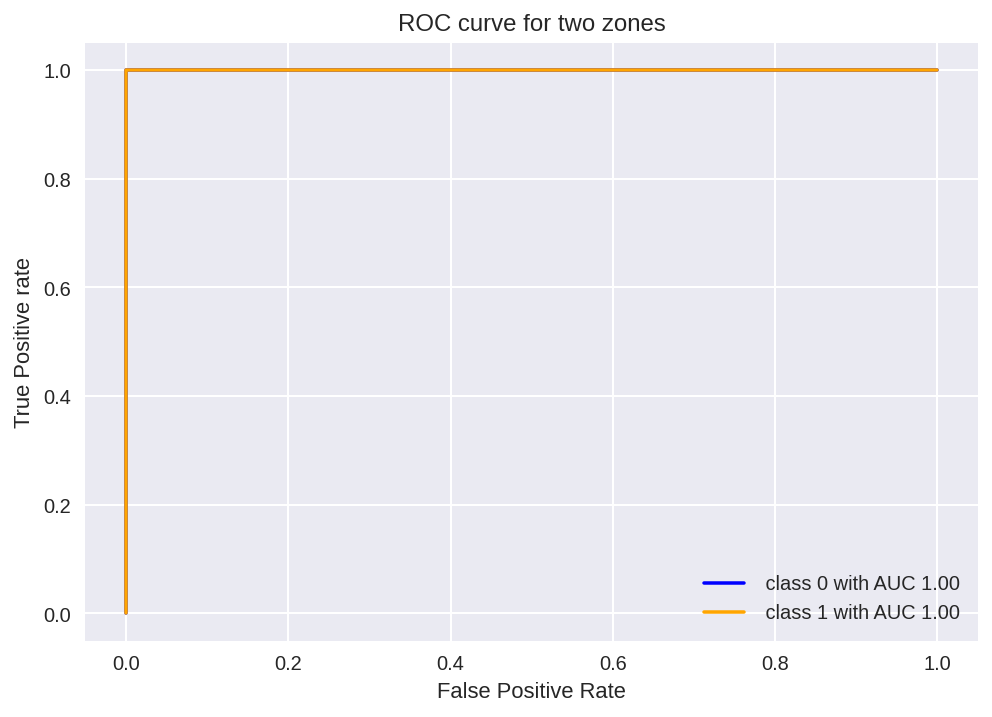

In [ ]:
 #roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2
y=[0,1]
color=['blue','orange']

#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(y[i])+' with AUC '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
#rcParams['figure.figsize'] = 61.7,97
#plt.figure(figsize=(21,17))
plt.title('ROC curve for two zones')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);    

In [ ]:
knn = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
knn =knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [ ]:
precision_train=format(precision_score(y_train, knn.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,knn.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,knn.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, knn.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,knn.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,knn.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['KNN',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878


In [ ]:
estimators = [
               
               ('xgb', XGBClassifier(n_estimators=2000, eta=.1, subsample=.8, colsample_bytree=.2,eval_metric='mlogloss')),
               
                ('knn',  KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)),
               ('svm', SVC(kernel='rbf',degree=2,gamma=.3,C=1,random_state=42))
                ] 
clf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=5000))

clf1.fit(X_train, y_train).score(X_test, y_test)

0.8858695652173914

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=21)
rf = rf.fit(X_train,y_train)

In [ ]:
precision_train=format(precision_score(y_train, rf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,rf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,rf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, rf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,rf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,rf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Random Forest',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



svc = SVC(kernel='rbf',degree=3,C=.1,random_state=2021).fit(X_train, y_train)
y_pred = svc.predict(X_test)


In [ ]:
precision_train=format(precision_score(y_train, svc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,svc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,svc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, svc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,svc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,svc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[2] = ['Suppor Vector Machine',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
2,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
3,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, gb.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,gb.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,gb.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, gb.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,gb.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,gb.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Gradient Boosting',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
2,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
3,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838


In [ ]:
from sklearn.linear_model import SGDClassifier
#from sklearn.metrics import classification_report
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)

sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, sgdc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,sgdc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,sgdc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, sgdc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,sgdc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,sgdc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['SGD Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800


In [ ]:
xgb= XGBClassifier(n_estimators=2000, eta=.1, subsample=.7, colsample_bytree=.3,eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.1,
              eval_metric='mlogloss', gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=2000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [ ]:
precision_train=format(precision_score(y_train, xgb.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,xgb.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,xgb.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, xgb.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,xgb.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,xgb.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['XGB Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800
6,XGB Classifier,0.999,0.999,0.999,0.867,0.865,0.866


In [ ]:
mlpc=MLPClassifier(hidden_layer_sizes=(250,150,100), max_iter=100,activation = 'relu',solver='sgd',random_state=42)
mlpc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(250, 150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, mlpc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,mlpc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,mlpc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, mlpc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,mlpc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,mlpc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[8] = ['MLP Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800
6,XGB Classifier,0.999,0.999,0.999,0.867,0.865,0.866
8,MLP Classifier,0.804,0.800,0.802,0.851,0.847,0.849


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train).score(X_test,y_test)

0.842391304347826

In [ ]:
precision_train=format(precision_score(y_train, dt.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,dt.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,dt.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, dt.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,dt.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,dt.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Decision Tree Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800
6,XGB Classifier,0.999,0.999,0.999,0.867,0.865,0.866
8,Decision Tree Classifier,1.000,1.000,1.000,0.838,0.840,0.839


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME',learning_rate=1.0,n_estimators=500)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='hinge', max_iter=1000,
                                                n_iter_no_change=5, n_jobs=None,
                                                penalty='l2', power_t=0.5,
                                                random_state=None, shuffle=True,
                                                tol=0.001,
                                                validation_fraction=0.1,
                           

In [ ]:
precision_train=format(precision_score(y_train, ada.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,ada.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,ada.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, ada.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,ada.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,ada.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['AdaBoost Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800
6,XGB Classifier,0.999,0.999,0.999,0.867,0.865,0.866
8,AdaBoost Classifier,0.829,0.828,0.829,0.855,0.859,0.856


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NV = GaussianNB()
NV.fit(X_train, y_train)
y_pred = NV.predict(X_test)

In [ ]:
precision_train=format(precision_score(y_train, NV.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,NV.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,NV.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, NV.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,NV.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,NV.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Naive Bayes',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,KNN,0.839,0.837,0.838,0.877,0.881,0.878
1,Stacking,0.865,0.864,0.864,0.899,0.902,0.900
2,Random Forest,0.994,0.993,0.993,0.861,0.860,0.861
3,Suppor Vector Machine,0.827,0.824,0.825,0.855,0.855,0.855
4,Gradient Boosting,0.924,0.923,0.923,0.840,0.836,0.838
5,SGD Classifier,0.799,0.758,0.760,0.837,0.792,0.800
6,XGB Classifier,0.999,0.999,0.999,0.867,0.865,0.866
8,Naive Bayes,0.834,0.835,0.835,0.839,0.845,0.840


###Heading2


In [ ]:
df = pd.read_csv('/content/data_2.csv',index_col=0)

In [ ]:
df.num = df.num.where(df.num < 1, 1)

In [ ]:
df.drop(['level_0','index'], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,0.0,2.0,150.0,0.0,2.2,3.0,0.0,3.0,0.0
1,67.0,1.0,4.0,160.0,228.0,0.0,2.0,108.0,1.0,2.5,2.0,0.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,1.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,71.0,0.0,0.0,2.0,1.0,3.0,1.0
916,62.0,1.0,4.0,130.0,139.0,0.0,0.0,80.0,0.0,-0.5,1.0,1.0,7.0,0.0
917,56.0,1.0,4.0,122.0,216.0,1.0,1.0,100.0,0.0,0.0,2.0,1.0,6.0,1.0
918,58.0,1.0,4.0,146.0,385.0,1.0,2.0,157.0,1.0,1.4,2.0,0.0,7.0,0.0


In [ ]:
X = df.drop(['num'], axis=1)
#X=df.drop(['level_0','index'], axis=1)
y = df['num']

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak','thal','ca']]
#features = [['age' ,	'sex' ,	'cp',	'trestbps' 	,	'restecg' ,	'thalach' ,	'exang' ,	'oldpeak' ,	'slope' ,	'ca' 	,'thal']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

In [ ]:
X = df[feature]
#X=df.drop(['level_0','index'], axis=1)
y = df['num']

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state=42)

In [ ]:
sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
counter = Counter(y)
print(counter)

Counter({1.0: 524, 0.0: 396})


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
oversample = SMOTE()
X_test, y_test = oversample.fit_resample(X_test, y_test)

In [ ]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
f_c = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
f_c = f_c.fit(X_train,y_train)
y_pred = f_c.predict(X_test)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 366, 1.0: 366})


In [ ]:
counter = Counter(y_test)
print(counter)

Counter({0.0: 158, 1.0: 158})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

estimators = [
               
             
               ('xgb', XGBClassifier(n_estimators=2000, eta=.1, subsample=.7, colsample_bytree=.3,eval_metric='mlogloss')),
               #('svm', SVC(kernel='rbf',degree=5,gamma=.3,C=2,random_state=42)),
                ('knn',  KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)),
    #('ada',AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME',learning_rate=1.0,n_estimators=500)),
               ('classifier' ,MLPClassifier(hidden_layer_sizes=(250,150,100), max_iter=100,activation = 'relu',solver='sgd',random_state=42))
                ] 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=5000))

clf.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.8227848101265823